#Автоматическое машинное обучение

Прогнозирование прибыли интернет-магазина (продажи велосипедов, запчастей к ним, аксессуаров и спортивной одежды)

In [ ]:
!nvidia-smi

Sat Nov 23 04:02:33 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!apt-get install default-jre
!java -version

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  default-jre-headless fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libfontenc1 libxkbfile1 libxtst6 libxxf86dga1 openjdk-11-jre x11-utils
Suggested packages:
  mesa-utils
The following NEW packages will be installed:
  default-jre default-jre-headless fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libfontenc1 libxkbfile1 libxtst6 libxxf86dga1 openjdk-11-jre x11-utils
0 upgraded, 12 newly installed, 0 to remove and 49 not upgraded.
Need to get 3,722 kB of archives.
After this operation, 12.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 default-jre-headless amd64 2:1.11-72build2 [3,042 B]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxtst6 amd64 2:1.2.3-1build4 [13.4 kB]
Get:3 http://archive.ubuntu.com

#Установка и инициализация

In [ ]:
!pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.8/265.8 MB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.46.0.6-py2.py3-none-any.whl size=265859786 sha256=de79902d67fc1cf8f28322b7516f305aa10aa87d88156591e8ed2fb1e735cc87
  Stored in directory: /root/.cache/pip/wheels/0c/95/eb/b449c73f478dbc4557b80170cf7f2aa6db15862877e9a63536
Successfully built h2o


In [ ]:
 import h2o

In [ ]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.25" 2024-10-15; OpenJDK Runtime Environment (build 11.0.25+9-post-Ubuntu-1ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.25+9-post-Ubuntu-1ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp6g864f0b
  JVM stdout: /tmp/tmp6g864f0b/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp6g864f0b/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.6
H2O_cluster_version_age:,20 days
H2O_cluster_name:,H2O_from_python_unknownUser_5nxvnc
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
from h2o.automl import H2OAutoML

##Загрузка данных

In [ ]:
profif_df = h2o.import_file('/content/case-31.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
profit_df

product_id,order_date,ship_date,customer_id,promotion_id,territory_id,order_number,order_quantity,unit_price,total_cost,revenue,tax,year,month,year_month,client_name,m-status,gender,y_income,children,children_home,education,occupation,house,cars,first_purchase,distance,city,state,country_x,age,product,sub_category,category,cost,days_manufacture,productLine,model,start_date,region,country_y,group,education_code,occupation_code,subcategory_code,category_code,productline_code,region_code,group_code,profit
214,2016-01-01 00:00:00,2016-01-08 00:00:00,16313,1,8,51180,1,35,13.1,35,2.8,2016,1,2016-01-01 00:00:00,Hailey Russell,0,0,30000,4,4,Partial College,Clerical,1,1,2006-11-14 00:00:00,0.5,Paderborn,Nordrhein-Westfalen,3,35,"Sport-100 Helmet, Red",Helmets,Accessories,13.1,0,Sport,Sport-100,2007-07-01 00:00:00,Germany,Germany,Europe,3,0,7,0,2,4,0,19.1
214,2016-01-01 00:00:00,2016-01-08 00:00:00,12132,1,7,51181,1,35,13.1,35,2.8,2016,1,2016-01-01 00:00:00,Kaitlyn Henderson,1,0,110000,3,4,Partial College,Professional,1,4,2005-08-02 00:00:00,7.5,Tremblay-en-France,Seine Saint Denis,2,58,"Sport-100 Helmet, Red",Helmets,Accessories,13.1,0,Sport,Sport-100,2007-07-01 00:00:00,France,France,Europe,3,3,7,0,2,3,0,19.1
214,2016-01-02 00:00:00,2016-01-09 00:00:00,12390,1,8,51191,1,35,13.1,35,2.8,2016,1,2016-01-01 00:00:00,Denise Martinez,0,0,40000,1,1,Partial College,Clerical,0,1,2007-02-06 00:00:00,0.5,Berlin,Hamburg,3,41,"Sport-100 Helmet, Red",Helmets,Accessories,13.1,0,Sport,Sport-100,2007-07-01 00:00:00,Germany,Germany,Europe,3,0,7,0,2,4,0,19.1
214,2016-01-02 00:00:00,2016-01-09 00:00:00,11241,1,7,51192,1,35,13.1,35,2.8,2016,1,2016-01-01 00:00:00,Lisa Cai,0,0,100000,2,3,Partial College,Professional,1,4,2007-03-14 00:00:00,7.5,Les Ulis,Essonne,2,56,"Sport-100 Helmet, Red",Helmets,Accessories,13.1,0,Sport,Sport-100,2007-07-01 00:00:00,France,France,Europe,3,3,7,0,2,3,0,19.1
214,2016-01-03 00:00:00,2016-01-10 00:00:00,11338,1,8,51207,1,35,13.1,35,2.8,2016,1,2016-01-01 00:00:00,Frank Navarro,1,1,20000,1,0,Graduate Degree,Clerical,1,0,2006-04-13 00:00:00,0.5,Bonn,Nordrhein-Westfalen,3,52,"Sport-100 Helmet, Red",Helmets,Accessories,13.1,0,Sport,Sport-100,2007-07-01 00:00:00,Germany,Germany,Europe,1,0,7,0,2,4,0,19.1
214,2016-01-03 00:00:00,2016-01-10 00:00:00,24604,1,9,51212,1,35,13.1,35,2.8,2016,1,2016-01-01 00:00:00,Melvin Rai,1,1,90000,0,0,Bachelors,Professional,1,3,2007-06-28 00:00:00,10,Sydney,New South Wales,0,41,"Sport-100 Helmet, Red",Helmets,Accessories,13.1,0,Sport,Sport-100,2007-07-01 00:00:00,Australia,Australia,Pacific,0,3,7,0,2,0,2,19.1
214,2016-01-04 00:00:00,2016-01-11 00:00:00,11615,1,10,51232,1,35,13.1,35,2.8,2016,1,2016-01-01 00:00:00,Dwayne Navarro,1,1,40000,1,1,Bachelors,Skilled Manual,1,0,2006-08-25 00:00:00,1.5,Lancaster,England,4,38,"Sport-100 Helmet, Red",Helmets,Accessories,13.1,0,Sport,Sport-100,2007-07-01 00:00:00,United Kingdom,United Kingdom,Europe,0,4,7,0,2,9,0,19.1
214,2016-01-04 00:00:00,2016-01-11 00:00:00,28204,1,9,51234,1,35,13.1,35,2.8,2016,1,2016-01-01 00:00:00,Peter Xu,1,1,100000,1,0,Graduate Degree,Management,1,0,2007-07-04 00:00:00,3.5,Wollongong,New South Wales,0,44,"Sport-100 Helmet, Red",Helmets,Accessories,13.1,0,Sport,Sport-100,2007-07-01 00:00:00,Australia,Australia,Pacific,1,1,7,0,2,0,2,19.1
214,2016-01-04 00:00:00,2016-01-11 00:00:00,11061,1,9,51237,1,35,13.1,35,2.8,2016,1,2016-01-01 00:00:00,Todd Gao,1,1,80000,2,0,Partial College,Skilled Manual,1,2,2005-09-13 00:00:00,7.5,Gold Coast,Queensland,0,59,"Sport-100 Helmet, Red",Helmets,Accessories,13.1,0,Sport,Sport-100,2007-07-01 00:00:00,Australia,Australia,Pacific,3,4,7,0,2,0,2,19.1
214,2016-01-04 00:00:00,2016-01-11 00:00:00,25625,1,8,51246,1,35,13.1,35,2.8,2016,1,2016-01-01 00:00:00,Krystal Cai,1,0,10000,3,2,Partial High School,Manual,1,1,2007-07-04 00:00:00,0.5,Hamburg,Hamburg,3,49,"Sport-100 Helmet, Red",Helmets,Accessories,13.1,0,Sport,Sport-100,2007-07-01 00:00:00,Germany,Germany,Europe,4,2,7,0,2,4,0,19.1


In [ ]:
profit_df.types

{'product_id': 'int',
 'order_date': 'time',
 'ship_date': 'time',
 'customer_id': 'int',
 'promotion_id': 'int',
 'territory_id': 'int',
 'order_number': 'int',
 'order_quantity': 'int',
 'unit_price': 'real',
 'total_cost': 'real',
 'revenue': 'real',
 'tax': 'real',
 'year': 'int',
 'month': 'int',
 'year_month': 'time',
 'client_name': 'enum',
 'm-status': 'int',
 'gender': 'int',
 'y_income': 'int',
 'children': 'int',
 'children_home': 'int',
 'education': 'enum',
 'occupation': 'enum',
 'house': 'int',
 'cars': 'int',
 'first_purchase': 'time',
 'distance': 'real',
 'city': 'enum',
 'state': 'enum',
 'country_x': 'int',
 'age': 'int',
 'product': 'enum',
 'sub_category': 'enum',
 'category': 'enum',
 'cost': 'real',
 'days_manufacture': 'int',
 'productLine': 'enum',
 'model': 'enum',
 'start_date': 'time',
 'region': 'enum',
 'country_y': 'enum',
 'group': 'enum',
 'education_code': 'int',
 'occupation_code': 'int',
 'subcategory_code': 'int',
 'category_code': 'int',
 'product

In [ ]:
profit_df.describe()

Rows:58189
Cols:50

,product_id,order_date,ship_date,customer_id,promotion_id,territory_id,order_number,order_quantity,unit_price,total_cost,revenue,tax,year,month,year_month,client_name,m-status,gender,y_income,children,children_home,education,occupation,house,cars,first_purchase,distance,city,state,country_x,age,product,sub_category,category,cost,days_manufacture,productLine,model,start_date,region,country_y,group,education_code,occupation_code,subcategory_code,category_code,productline_code,region_code,group_code,profit
type,int,time,time,int,int,int,int,int,real,real,real,real,int,int,time,enum,int,int,int,int,int,enum,enum,int,int,time,real,enum,enum,int,int,enum,enum,enum,real,int,enum,enum,time,enum,enum,enum,int,int,int,int,int,int,int,real
mins,214.0,1388534400000.0,1389139200000.0,11000.0,1.0,1.0,43697.0,1.0,2.3,0.9,2.3,0.2,2014.0,1.0,1388534400000.0,,0.0,0.0,10000.0,0.0,0.0,,,0.0,0.0,1120176000000.0,0.5,,,0.0,33.0,,,,0.9,0.0,,,1120176000000.0,,,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.2
mean,437.2083039749781,1464926169605.9397,1465531404657.237,18853.004640052226,1.0434274519239037,6.2617161319149615,61363.70800323085,1.56938596641977,503.67617075392263,465.27181941604044,790.160630015983,63.211309697709105,2015.8688068191577,7.159256904225878,1463655724786.4712,,0.5497946347247762,0.5037721906202203,59769.88777947722,1.838921445634055,1.0735018646135879,,,0.6905600714911753,1.5024661018405538,1182583498489.406,3.678427194143226,,,2.813968275790957,51.327433019986564,,,,296.54512880441405,1.0452147313066047,,,1179110691848.9749,,,,1.6487652305418543,2.2891439962879585,9.404646926395035,0.5591262953479181,1.2568698551272572,4.336008523947829,0.9213081510251079,261.6775009022323
maxs,606.0,1483056000000.0,1483747200000.0,29483.0,14.0,10.0,74147.0,4.0,3578.3,8685.2,14313.1,1145.0,2016.0,12.0,1480550400000.0,,1.0,1.0,170000.0,5.0,5.0,,,1.0,4.0,1214784000000.0,10.0,,,5.0,103.0,,,,2171.3,4.0,,,1183248000000.0,,,,4.0,4.0,16.0,2.0,3.0,9.0,2.0,4863.4
sigma,118.09974574106336,16445896138.291767,16449514663.153198,5433.374314684381,0.34894834660368823,2.960247742684054,7777.244550894723,1.0475324634860386,941.4663936095933,1099.3062039402266,1849.036218799759,147.92369376796645,0.4356680878574012,3.2842867719503377,16433430386.779385,,0.49751859076737615,0.4999900666532166,33128.041817991034,1.6144668603310839,1.580054978652596,,,0.4622667319913714,1.155495744306054,24514626433.88116,3.5124490854676407,,,2.0202505013371073,11.005495245446662,,,,560.166254348374,1.7573952790039882,,,13739228818.675592,,,,1.35901993064411,1.4087110304874124,4.429442307757161,0.7377913311640478,0.94970052657684,3.375312316308131,0.7199762597904567,608.0362604105834
zeros,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,,26197,28875,0,16474,34294,,,18006,13700,0,0,,,12972,0,,,,0,42984,,,0,,,,17602,9315,308,34319,16242,12972,17551,0
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,214.0,2016-01-01 00:00:00,2016-01-08 00:00:00,16313.0,1.0,8.0,51180.0,1.0,35.0,13.1,35.0,2.8,2016.0,1.0,2016-01-01 00:00:00,Hailey Russell,0.0,0.0,30000.0,4.0,4.0,Partial College,Clerical,1.0,1.0,2006-11-14 00:00:00,0.5,Paderborn,Nordrhein-Westfalen,3.0,35.0,"Sport-100 Helmet, Red",Helmets,Accessories,13.1,0.0,Sport,Sport-100,2007-07-01 00:00:00,Germany,Germany,Europe,3.0,0.0,7.0,0.0,2.0,4.0,0.0,19.1
1,214.0,2016-01-01 00:00:00,2016-01-08 00:00:00,12132.0,1.0,7.0,51181.0,1.0,35.0,13.1,35.0,2.8,2016.0,1.0,2016-01-01 00:00:00,Kaitlyn Henderson,1.0,0.0,110000.0,3.0,4.0,Partial College,Professional,1.0,4.0,2005-08-02 00:00:00,7.5,Tremblay-en-France,Seine Saint Denis,2.0,58.0,"Sport-100 Helmet, Red",Helmets,Accessories,13.1,0.0,Sport,Sport-100,2007-07-01 00:00:00,France,France,Europe,3.0,3.0,7.0,0.0,2.0,3.0,0.0,19.1
2,214.0,2016-01-02 00:00:00,2016-01-09 00:00:00,12390.0,1.0,8.0,51191.0,1.0,35.0,13.1,35.0,2.8,2016.0,1.0,2016-01-01 00:00:00,Denise Martinez,0.0,0.0,40000.0,1.0,1.0,Partial College,Clerical,0.0,1.0,2007-02-06 00:00:00,0.5,Berlin,Hamburg,3.0,41.0,"Spor

#Разделение выборки

In [ ]:
profit_train,profit_test,profit_valid = profit_df.split_frame(ratios=[.7, .15])

In [ ]:
profit_train

product_id,order_date,ship_date,customer_id,promotion_id,territory_id,order_number,order_quantity,unit_price,total_cost,revenue,tax,year,month,year_month,client_name,m-status,gender,y_income,children,children_home,education,occupation,house,cars,first_purchase,distance,city,state,country_x,age,product,sub_category,category,cost,days_manufacture,productLine,model,start_date,region,country_y,group,education_code,occupation_code,subcategory_code,category_code,productline_code,region_code,group_code,profit
214,2016-01-01 00:00:00,2016-01-08 00:00:00,16313,1,8,51180,1,35,13.1,35,2.8,2016,1,2016-01-01 00:00:00,Hailey Russell,0,0,30000,4,4,Partial College,Clerical,1,1,2006-11-14 00:00:00,0.5,Paderborn,Nordrhein-Westfalen,3,35,"Sport-100 Helmet, Red",Helmets,Accessories,13.1,0,Sport,Sport-100,2007-07-01 00:00:00,Germany,Germany,Europe,3,0,7,0,2,4,0,19.1
214,2016-01-01 00:00:00,2016-01-08 00:00:00,12132,1,7,51181,1,35,13.1,35,2.8,2016,1,2016-01-01 00:00:00,Kaitlyn Henderson,1,0,110000,3,4,Partial College,Professional,1,4,2005-08-02 00:00:00,7.5,Tremblay-en-France,Seine Saint Denis,2,58,"Sport-100 Helmet, Red",Helmets,Accessories,13.1,0,Sport,Sport-100,2007-07-01 00:00:00,France,France,Europe,3,3,7,0,2,3,0,19.1
214,2016-01-02 00:00:00,2016-01-09 00:00:00,12390,1,8,51191,1,35,13.1,35,2.8,2016,1,2016-01-01 00:00:00,Denise Martinez,0,0,40000,1,1,Partial College,Clerical,0,1,2007-02-06 00:00:00,0.5,Berlin,Hamburg,3,41,"Sport-100 Helmet, Red",Helmets,Accessories,13.1,0,Sport,Sport-100,2007-07-01 00:00:00,Germany,Germany,Europe,3,0,7,0,2,4,0,19.1
214,2016-01-02 00:00:00,2016-01-09 00:00:00,11241,1,7,51192,1,35,13.1,35,2.8,2016,1,2016-01-01 00:00:00,Lisa Cai,0,0,100000,2,3,Partial College,Professional,1,4,2007-03-14 00:00:00,7.5,Les Ulis,Essonne,2,56,"Sport-100 Helmet, Red",Helmets,Accessories,13.1,0,Sport,Sport-100,2007-07-01 00:00:00,France,France,Europe,3,3,7,0,2,3,0,19.1
214,2016-01-03 00:00:00,2016-01-10 00:00:00,11338,1,8,51207,1,35,13.1,35,2.8,2016,1,2016-01-01 00:00:00,Frank Navarro,1,1,20000,1,0,Graduate Degree,Clerical,1,0,2006-04-13 00:00:00,0.5,Bonn,Nordrhein-Westfalen,3,52,"Sport-100 Helmet, Red",Helmets,Accessories,13.1,0,Sport,Sport-100,2007-07-01 00:00:00,Germany,Germany,Europe,1,0,7,0,2,4,0,19.1
214,2016-01-03 00:00:00,2016-01-10 00:00:00,24604,1,9,51212,1,35,13.1,35,2.8,2016,1,2016-01-01 00:00:00,Melvin Rai,1,1,90000,0,0,Bachelors,Professional,1,3,2007-06-28 00:00:00,10,Sydney,New South Wales,0,41,"Sport-100 Helmet, Red",Helmets,Accessories,13.1,0,Sport,Sport-100,2007-07-01 00:00:00,Australia,Australia,Pacific,0,3,7,0,2,0,2,19.1
214,2016-01-04 00:00:00,2016-01-11 00:00:00,28204,1,9,51234,1,35,13.1,35,2.8,2016,1,2016-01-01 00:00:00,Peter Xu,1,1,100000,1,0,Graduate Degree,Management,1,0,2007-07-04 00:00:00,3.5,Wollongong,New South Wales,0,44,"Sport-100 Helmet, Red",Helmets,Accessories,13.1,0,Sport,Sport-100,2007-07-01 00:00:00,Australia,Australia,Pacific,1,1,7,0,2,0,2,19.1
214,2016-01-04 00:00:00,2016-01-11 00:00:00,11061,1,9,51237,1,35,13.1,35,2.8,2016,1,2016-01-01 00:00:00,Todd Gao,1,1,80000,2,0,Partial College,Skilled Manual,1,2,2005-09-13 00:00:00,7.5,Gold Coast,Queensland,0,59,"Sport-100 Helmet, Red",Helmets,Accessories,13.1,0,Sport,Sport-100,2007-07-01 00:00:00,Australia,Australia,Pacific,3,4,7,0,2,0,2,19.1
214,2016-01-04 00:00:00,2016-01-11 00:00:00,25625,1,8,51246,1,35,13.1,35,2.8,2016,1,2016-01-01 00:00:00,Krystal Cai,1,0,10000,3,2,Partial High School,Manual,1,1,2007-07-04 00:00:00,0.5,Hamburg,Hamburg,3,49,"Sport-100 Helmet, Red",Helmets,Accessories,13.1,0,Sport,Sport-100,2007-07-01 00:00:00,Germany,Germany,Europe,4,2,7,0,2,4,0,19.1
214,2016-01-05 00:00:00,2016-01-12 00:00:00,18544,1,6,51258,1,35,13.1,35,2.8,2016,1,2016-01-01 00:00:00,Riley Washington,1,0,40000,4,0,High School,Professional,0,2,2007-07-05 00:00:00,10,Victoria,British Columbia,1,69,"Sport-100 Helmet, Red",Helmets,Accessories,13.1,0,Sport,Sport-100,2007-07-01 00:00:00,Canada,Canada,North America,2,3,7,0,2,1,1,19.1


In [ ]:
y = "profit"
x = profit_df.columns
x.remove(y)
x.remove('customer_id')

<Будем анализировать влияние признаков датасета на прибыль

In [ ]:
aml = H2OAutoML(max_models = 15, seed = 10, verbosity="info", nfolds=2)

In [ ]:
!nvidia-smi

Sat Nov 23 04:19:13 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## Обучение

In [ ]:
aml.train(x = x, y = y, training_frame = profit_train, validation_frame=profit_valid)

AutoML progress: |
04:19:17.230: Project: AutoML_1_20241123_41917
04:19:17.231: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
04:19:17.231: Setting stopping tolerance adaptively based on the training frame: 0.00495183015086038
04:19:17.231: Build control seed: 10
04:19:17.232: training frame: Frame key: AutoML_1_20241123_41917_training_py_6_sid_957a    cols: 50    rows: 40782  chunks: 8    size: 5029862  checksum: 5115418780282972816
04:19:17.232: validation frame: Frame key: py_8_sid_957a    cols: 50    rows: 8717  chunks: 8    size: 2413154  checksum: -4568376764902764590
04:19:17.233: leaderboard frame: NULL
04:19:17.233: blending frame: NULL
04:19:17.233: response column: profit
04:19:17.233: fold column: null
04:19:17.233: weights column: null
04:19:17.253: Loading executi

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_grid_1_AutoML_1_20241123_41917_model_2


Model Summary: 
    number_of_trees
--  -----------------
    77

ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 0.043462309064236725
RMSE: 0.2084761594625072
MAE: 0.01329077700373412
RMSLE: 0.005126539897813198
Mean Residual Deviance: 0.043462309064236725

ModelMetricsRegression: xgboost
** Reported on validation data. **

MSE: 0.0472533596947113
RMSE: 0.21737837908750562
MAE: 0.025963391611660048
RMSLE: 0.004908555987218072
Mean Residual Deviance: 0.0472533596947113

ModelMetricsRegression: xgboost
** Reported on cross-validation data. **

MSE: 0.817792862687474
RMSE: 0.9043190049354675
MAE: 0.042612930767003926
RMSLE: 0.015084486974595305
Mean Residual Deviance: 0.817792862687474

Cross-Validation Metrics Summary: 
                        mean       sd           cv_1_valid    cv_2_valid
----------------------  ---------  -----------  ------------  ------------
aic                     nan        0            nan           nan
loglikelihood           nan        0            nan           nan
mae                     0.0426129  0.0115972    0.0508134     0.0344125
mean_residual_deviance  0.817793   0.986388     0.120311      1.51527
mse                     0.817793   0.986388     0.120311      1.51527
r2                      0.999998   2.59875e-06  1             0.999996
residual_deviance       0.817793   0.986388     0.120311      1.51527
rmse                    0.788912   0.625157     0.346859      1.23096
rmsle                   0.0149841  0.00245753   0.0167218     0.0132463

Scoring History: 
    timestamp            duration          number_of_trees    training_rmse    training_mae    training_deviance    validation_rmse    validation_mae    validation_deviance
--  -------------------  ----------------  -----------------  ---------------  --------------  -------------------  -----------------  ----------------  ---------------------
    2024-11-23 04:58:17  6 min 47.333 sec  0                  666.824          263.538         444654               660.326            258.271           436030
    2024-11-23 04:58:19  6 min 50.294 sec  5                  113.572          44.656          12898.7              112.534            43.7846           12664
    2024-11-23 04:58:23  6 min 53.764 sec  10                 19.4505          7.59573         378.324              19.2706            7.44825           371.357
    2024-11-23 04:58:27  6 min 58.140 sec  15                 3.39992          1.2997          11.5594              3.32033            1.27002           11.0246
    2024-11-23 04:58:33  7 min  3.367 sec  20                 0.801394         0.229716        0.642233             0.59915            0.224427          0.358981
    2024-11-23 04:58:38  7 min  8.986 sec  25                 0.51373          0.0491533       0.263919             0.192899           0.0488407         0.0372102
    2024-11-23 04:58:44  7 min 14.968 sec  30                 0.461553         0.018835        0.213031             0.164518           0.0213213         0.0270663
    2024-11-23 04:58:50  7 min 20.999 sec  35                 0.414176         0.0147619       0.171542             0.163376           0.0185179         0.0266916
    2024-11-23 04:58:55  7 min 25.533 sec  40                 0.382654         0.0147246       0.146424             0.182196           0.0201522         0.0331955
    2024-11-23 04:59:00  7 min 30.622 sec  45                 0.351695         0.0150421       0.123689             0.188225           0.0211335         0.0354285
    2024-11-23 04:59:05  7 min 35.503 sec  50                 0.318935         0.0148349       0.10172              0.184096           0.0225218         0.0338912
    2024-11-23 04:59:08  7 min 39.231 sec  55                 0.294342         0.0147685       0.0866373            0.192382           0.0238948         0.0370108
    2024-11-23 04:59:12  7 min 43.257 sec  60  

In [ ]:
!nvidia-smi

Sat Nov 23 05:02:07 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   62C    P0              27W /  70W |    205MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

#Сравнение моделей

In [ ]:
lb = aml.leaderboard

In [ ]:
lb.head(20)

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
XGBoost_grid_1_AutoML_1_20241123_41917_model_2,0.904319,0.817793,0.0426129,0.0150845,0.817793
StackedEnsemble_AllModels_1_AutoML_1_20241123_41917,0.938015,0.879873,0.164187,0.0207294,0.879873
StackedEnsemble_BestOfFamily_1_AutoML_1_20241123_41917,0.939477,0.882616,0.164492,0.0209021,0.882616
XGBoost_3_AutoML_1_20241123_41917,0.961141,0.923792,0.0892561,0.0135635,0.923792
XGBoost_2_AutoML_1_20241123_41917,0.961276,0.924051,0.0544974,0.00921322,0.924051
XGBoost_1_AutoML_1_20241123_41917,0.963536,0.928401,0.120882,0.0142219,0.928401
GBM_2_AutoML_1_20241123_41917,1.83487,3.36673,0.210675,0.0155089,3.36673
XGBoost_grid_1_AutoML_1_20241123_41917_model_1,1.86483,3.47761,0.274682,nan,3.47761
GBM_5_AutoML_1_20241123_41917,2.09565,4.39176,0.173149,0.0127106,4.39176
GBM_4_AutoML_1_20241123_41917,2.28996,5.24393,0.234418,0.0116582,5.24393


##Прогнозирование

In [ ]:
profit_pred=aml.leader.predict(profit_test)

xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%


In [ ]:
profit_pred.head()

predict
38.2011
38.1857
76.5202
76.4392
19.1013
38.1969
38.1969
76.5015
19.0994
19.0997


In [ ]:
aml.leader.model_performance(profit_test)

ModelMetricsRegression: xgboost
** Reported on test data. **

MSE: 0.038669084646342035
RMSE: 0.19664456424305768
MAE: 0.025655619184496214
RMSLE: 0.0032714284326435376
Mean Residual Deviance: 0.038669084646342035

In [ ]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [ ]:
model_ids

['XGBoost_grid_1_AutoML_1_20241123_41917_model_2',
 'StackedEnsemble_AllModels_1_AutoML_1_20241123_41917',
 'StackedEnsemble_BestOfFamily_1_AutoML_1_20241123_41917',
 'XGBoost_3_AutoML_1_20241123_41917',
 'XGBoost_2_AutoML_1_20241123_41917',
 'XGBoost_1_AutoML_1_20241123_41917',
 'GBM_2_AutoML_1_20241123_41917',
 'XGBoost_grid_1_AutoML_1_20241123_41917_model_1',
 'GBM_5_AutoML_1_20241123_41917',
 'GBM_4_AutoML_1_20241123_41917',
 'GBM_3_AutoML_1_20241123_41917',
 'DRF_1_AutoML_1_20241123_41917',
 'XRT_1_AutoML_1_20241123_41917',
 'GBM_grid_1_AutoML_1_20241123_41917_model_1',
 'GBM_1_AutoML_1_20241123_41917',
 'DeepLearning_1_AutoML_1_20241123_41917',
 'GLM_1_AutoML_1_20241123_41917']

In [ ]:
h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_grid_1_AutoML_1_20241123_41917_model_2


Model Summary: 
    number_of_trees
--  -----------------
    77

ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 0.043462309064236725
RMSE: 0.2084761594625072
MAE: 0.01329077700373412
RMSLE: 0.005126539897813198
Mean Residual Deviance: 0.043462309064236725

ModelMetricsRegression: xgboost
** Reported on validation data. **

MSE: 0.0472533596947113
RMSE: 0.21737837908750562
MAE: 0.025963391611660048
RMSLE: 0.004908555987218072
Mean Residual Deviance: 0.0472533596947113

ModelMetricsRegression: xgboost
** Reported on cross-validation data. **

MSE: 0.817792862687474
RMSE: 0.9043190049354675
MAE: 0.042612930767003926
RMSLE: 0.015084486974595305
Mean Residual Deviance: 0.817792862687474

Cross-Validation Metrics Summary: 
                        mean       sd           cv_1_valid    cv_2_valid
----------------------  ---------  -----------  ------------  ------------
aic                     nan        0            nan           nan
loglikelihood           nan        0            nan           nan
mae                     0.0426129  0.0115972    0.0508134     0.0344125
mean_residual_deviance  0.817793   0.986388     0.120311      1.51527
mse                     0.817793   0.986388     0.120311      1.51527
r2                      0.999998   2.59875e-06  1             0.999996
residual_deviance       0.817793   0.986388     0.120311      1.51527
rmse                    0.788912   0.625157     0.346859      1.23096
rmsle                   0.0149841  0.00245753   0.0167218     0.0132463

Scoring History: 
    timestamp            duration          number_of_trees    training_rmse    training_mae    training_deviance    validation_rmse    validation_mae    validation_deviance
--  -------------------  ----------------  -----------------  ---------------  --------------  -------------------  -----------------  ----------------  ---------------------
    2024-11-23 04:58:17  6 min 47.333 sec  0                  666.824          263.538         444654               660.326            258.271           436030
    2024-11-23 04:58:19  6 min 50.294 sec  5                  113.572          44.656          12898.7              112.534            43.7846           12664
    2024-11-23 04:58:23  6 min 53.764 sec  10                 19.4505          7.59573         378.324              19.2706            7.44825           371.357
    2024-11-23 04:58:27  6 min 58.140 sec  15                 3.39992          1.2997          11.5594              3.32033            1.27002           11.0246
    2024-11-23 04:58:33  7 min  3.367 sec  20                 0.801394         0.229716        0.642233             0.59915            0.224427          0.358981
    2024-11-23 04:58:38  7 min  8.986 sec  25                 0.51373          0.0491533       0.263919             0.192899           0.0488407         0.0372102
    2024-11-23 04:58:44  7 min 14.968 sec  30                 0.461553         0.018835        0.213031             0.164518           0.0213213         0.0270663
    2024-11-23 04:58:50  7 min 20.999 sec  35                 0.414176         0.0147619       0.171542             0.163376           0.0185179         0.0266916
    2024-11-23 04:58:55  7 min 25.533 sec  40                 0.382654         0.0147246       0.146424             0.182196           0.0201522         0.0331955
    2024-11-23 04:59:00  7 min 30.622 sec  45                 0.351695         0.0150421       0.123689             0.188225           0.0211335         0.0354285
    2024-11-23 04:59:05  7 min 35.503 sec  50                 0.318935         0.0148349       0.10172              0.184096           0.0225218         0.0338912
    2024-11-23 04:59:08  7 min 39.231 sec  55                 0.294342         0.0147685       0.0866373            0.192382           0.0238948         0.0370108
    2024-11-23 04:59:12  7 min 43.257 sec  60  

In [ ]:
out = h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

In [ ]:
out.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'XGBoost_grid_1_AutoML_1_20241123_41917_model_2',
   'type': 'Key<Model>',
   'URL': '/3/Models/XGBoost_grid_1_AutoML_1_20241123_41917_model_2'},
  'input': None},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_1_20241123_41917_training_py_6_sid_957a',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_1_20241123_41917_training_py_6_sid_957a'},
  'input': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_1_20241123_41917_training_py_6_sid_957a',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_1_20241123_41917_training_py_6_sid_957a'}},
 'validation_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'Fra

In [ ]:
out.convert_H2OXGBoostParams_2_XGBoostParams()

({'silent': True,
  'eta': 0.3,
  'colsample_bylevel': 0.6,
  'objective': 'reg:squarederror',
  'min_child_weight': 10.0,
  'nthread': 2,
  'seed': 11,
  'max_bin': 256,
  'max_depth': 12,
  'colsample_bytree': 0.8,
  'lambda': 1.0,
  'gamma': 0.0,
  'gpu_id': 0,
  'alpha': 0.001,
  'booster': 'gbtree',
  'grow_policy': 'depthwise',
  'nround': 77,
  'subsample': 1.0,
  'max_delta_step': 0.0,
  'tree_method': 'gpu_hist'},
 77)

In [ ]:
out

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_grid_1_AutoML_1_20241123_41917_model_2


Model Summary: 
    number_of_trees
--  -----------------
    77

ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 0.043462309064236725
RMSE: 0.2084761594625072
MAE: 0.01329077700373412
RMSLE: 0.005126539897813198
Mean Residual Deviance: 0.043462309064236725

ModelMetricsRegression: xgboost
** Reported on validation data. **

MSE: 0.0472533596947113
RMSE: 0.21737837908750562
MAE: 0.025963391611660048
RMSLE: 0.004908555987218072
Mean Residual Deviance: 0.0472533596947113

ModelMetricsRegression: xgboost
** Reported on cross-validation data. **

MSE: 0.817792862687474
RMSE: 0.9043190049354675
MAE: 0.042612930767003926
RMSLE: 0.015084486974595305
Mean Residual Deviance: 0.817792862687474

Cross-Validation Metrics Summary: 
                        mean       sd           cv_1_valid    cv_2_valid
----------------------  ---------  -----------  ------------  ------------
aic                     nan        0            nan           nan
loglikelihood           nan        0            nan           nan
mae                     0.0426129  0.0115972    0.0508134     0.0344125
mean_residual_deviance  0.817793   0.986388     0.120311      1.51527
mse                     0.817793   0.986388     0.120311      1.51527
r2                      0.999998   2.59875e-06  1             0.999996
residual_deviance       0.817793   0.986388     0.120311      1.51527
rmse                    0.788912   0.625157     0.346859      1.23096
rmsle                   0.0149841  0.00245753   0.0167218     0.0132463

Scoring History: 
    timestamp            duration          number_of_trees    training_rmse    training_mae    training_deviance    validation_rmse    validation_mae    validation_deviance
--  -------------------  ----------------  -----------------  ---------------  --------------  -------------------  -----------------  ----------------  ---------------------
    2024-11-23 04:58:17  6 min 47.333 sec  0                  666.824          263.538         444654               660.326            258.271           436030
    2024-11-23 04:58:19  6 min 50.294 sec  5                  113.572          44.656          12898.7              112.534            43.7846           12664
    2024-11-23 04:58:23  6 min 53.764 sec  10                 19.4505          7.59573         378.324              19.2706            7.44825           371.357
    2024-11-23 04:58:27  6 min 58.140 sec  15                 3.39992          1.2997          11.5594              3.32033            1.27002           11.0246
    2024-11-23 04:58:33  7 min  3.367 sec  20                 0.801394         0.229716        0.642233             0.59915            0.224427          0.358981
    2024-11-23 04:58:38  7 min  8.986 sec  25                 0.51373          0.0491533       0.263919             0.192899           0.0488407         0.0372102
    2024-11-23 04:58:44  7 min 14.968 sec  30                 0.461553         0.018835        0.213031             0.164518           0.0213213         0.0270663
    2024-11-23 04:58:50  7 min 20.999 sec  35                 0.414176         0.0147619       0.171542             0.163376           0.0185179         0.0266916
    2024-11-23 04:58:55  7 min 25.533 sec  40                 0.382654         0.0147246       0.146424             0.182196           0.0201522         0.0331955
    2024-11-23 04:59:00  7 min 30.622 sec  45                 0.351695         0.0150421       0.123689             0.188225           0.0211335         0.0354285
    2024-11-23 04:59:05  7 min 35.503 sec  50                 0.318935         0.0148349       0.10172              0.184096           0.0225218         0.0338912
    2024-11-23 04:59:08  7 min 39.231 sec  55                 0.294342         0.0147685       0.0866373            0.192382           0.0238948         0.0370108
    2024-11-23 04:59:12  7 min 43.257 sec  60  

In [ ]:
out_gbm = h2o.get_model([mid for mid in model_ids if "GBM" in mid][0])

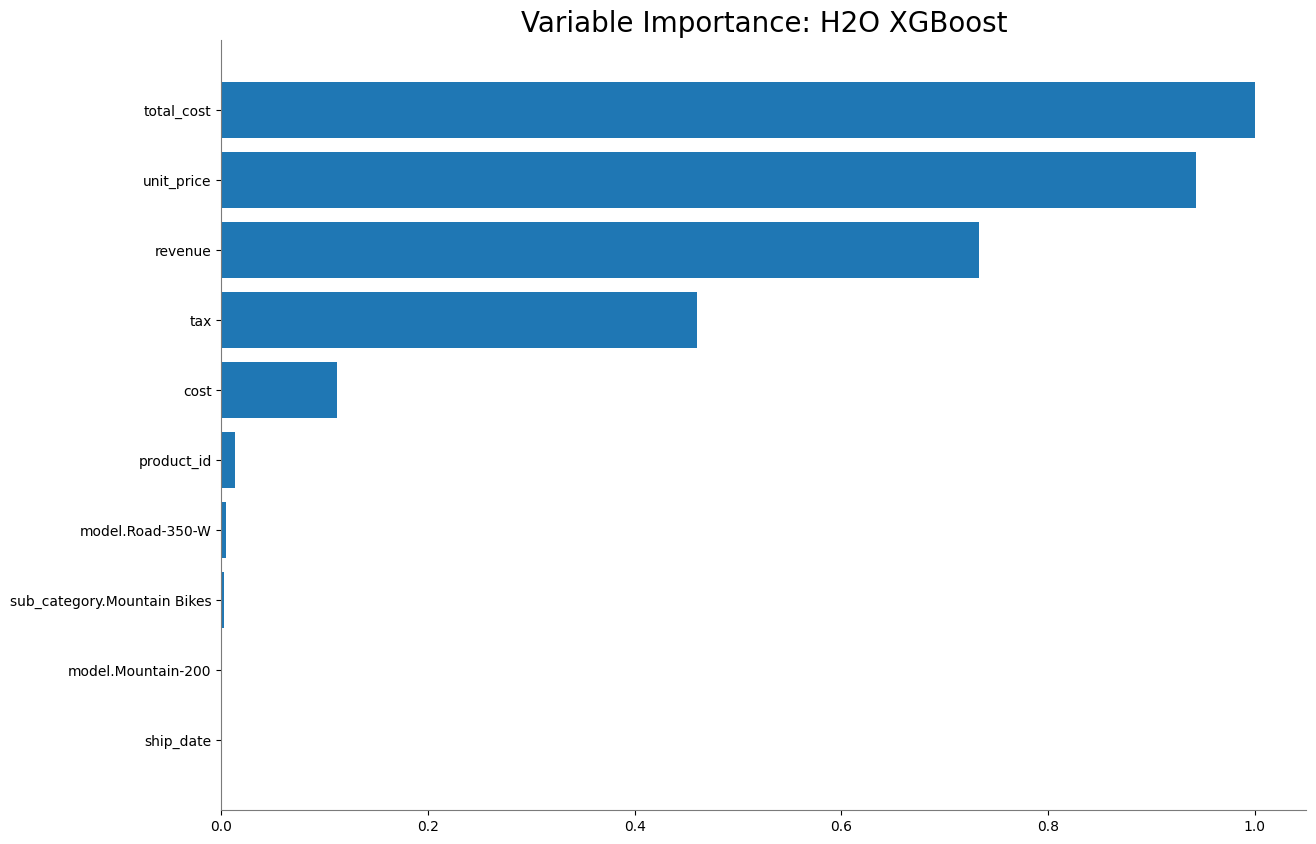

<Figure size 640x480 with 0 Axes>

In [ ]:
out.varimp_plot()

In [ ]:
aml.leader.download_mojo(path = "./")

'/content/XGBoost_grid_1_AutoML_1_20241123_41917_model_2.zip'

Таким образом, самой оптимальной моделью для анализируемого датасета "case-31" оказалась модель «Экстремального градиентного бустинга с поиском по сетке» (XGBoost_grid_1_AutoML_1_20241123_41917_model_2 (mse=0,817793, rmse = 0,904319)). Выявлено, что наибольшее влияние на прибыль оказывали себестоимость, розничная цена, выручка, налог. Наименование товара также влияло, но в гораздо меньшей степени. Значимо-важной оказалась подкатегория "горных велосипедов", модель "Mountain-200", а также модель дорожного велосипеда "Road-350W", что в целом согласуется с данными анализа в Power BI, которые указывали на влияние дорожных и горных велосипедов, в особенности моделей "Mountain-200"